In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv(r"C:\Users\4019-tjyen\Downloads\dasnet_results_12122024.csv")

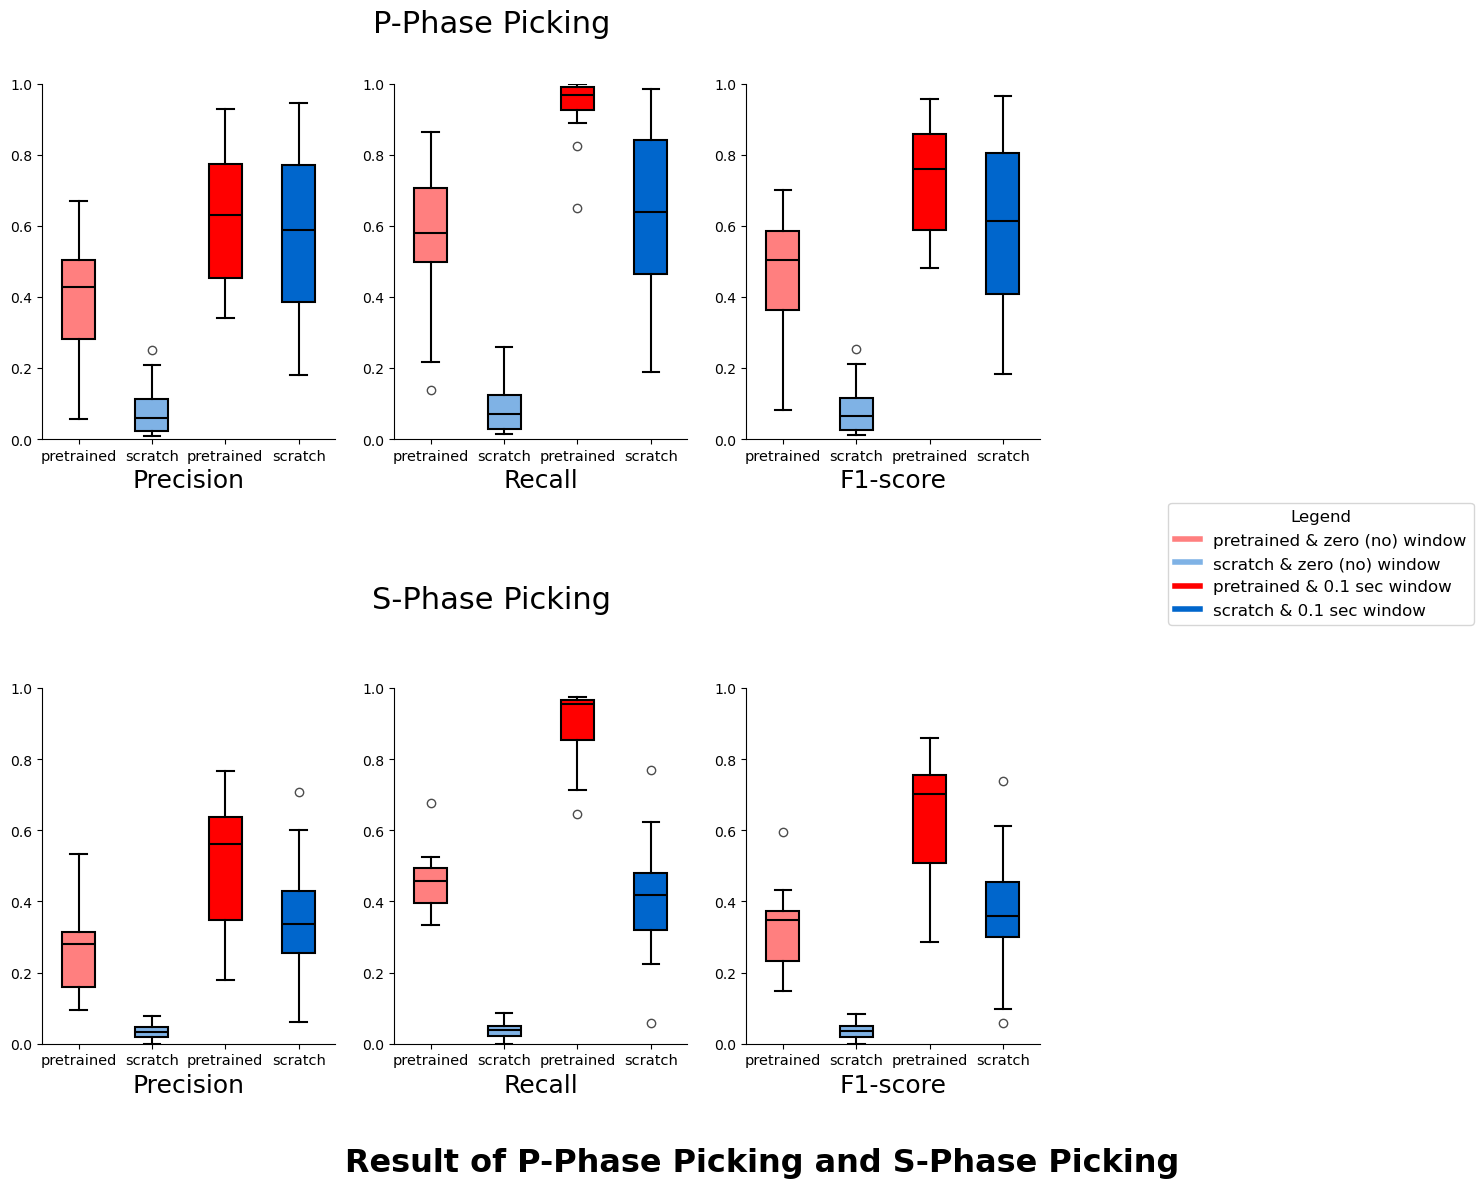

In [154]:

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 4, hspace=0.7, wspace=0.2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

box_colors = [("#FF0000", 0.5), ("#0066CC", 0.5), ("#FF0000", 1), ("#0066CC", 1)] 

for i, ax in enumerate(axes):
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.set_xticks([])

    if i == 0:  # Precision subplots
        ax.set_xlabel("Precision", fontsize=18)
        bp = ax.boxplot([data["pretrained_precision_pphase_w0"],
                         data["scratch_precision_pphase_w0"], 
                         data["pretrained_precision_pphase_w1"],
                         data["scratch_precision_pphase_w1"]],
                         patch_artist=True)
    
    elif i == 1:
        ax.set_xlabel("Recall", fontsize=18) 
        bp = ax.boxplot([data["pretrained_recall_pphase_w0"],
                         data["scratch_recall_pphase_w0"], 
                         data["pretrained_recall_pphase_w1"],
                         data["scratch_recall_pphase_w1"]],
                         patch_artist=True)   
        
    elif i == 2: 
        ax.set_xlabel("F1-score", fontsize=18)
        bp = ax.boxplot([data["pretrained_f1score_pphase_w0"],
                         data["scratch_f1score_pphase_w0"], 
                         data["pretrained_f1score_pphase_w1"],
                         data["scratch_f1score_pphase_w1"]],
                         patch_artist=True) 
        
    elif i == 3:  
        ax.set_xlabel("Precision", fontsize=18)
        bp = ax.boxplot([data["pretrained_precision_sphase_w0"],
                         data["scratch_precision_sphase_w0"], 
                         data["pretrained_precision_sphase_w1"],
                         data["scratch_precision_sphase_w1"]],
                         patch_artist=True)
        
    elif i == 4:  
        ax.set_xlabel("Recall", fontsize=18)
        bp = ax.boxplot([data["pretrained_recall_sphase_w0"],
                         data["scratch_recall_sphase_w0"], 
                         data["pretrained_recall_sphase_w1"],
                         data["scratch_recall_sphase_w1"]],
                         patch_artist=True) 
        
    elif i == 5:  
        ax.set_xlabel("F1-score", fontsize=18)
        bp = ax.boxplot([data["pretrained_f1score_sphase_w0"],
                         data["scratch_f1score_sphase_w0"], 
                         data["pretrained_f1score_sphase_w1"],
                         data["scratch_f1score_sphase_w1"]],
                         patch_artist=True) 
    
    ax.set_ylim(0, 1)

    for patch, color in zip(bp["boxes"], box_colors):
        patch.set_facecolor(color)
        patch.set_edgecolor("black")
        patch.set_linewidth(1.5)

    for whisker in bp["whiskers"]:
        whisker.set_color("black")
        whisker.set_linewidth(1.5)
    
    for cap in bp["caps"]:
        cap.set_color("black")
        cap.set_linewidth(1.5)

    for median in bp["medians"]:
        median.set_color("black")
        median.set_linewidth(1.5)
    
    for flier in bp["fliers"]:
        flier.set(marker="o", color="black", alpha=0.7)

    ax.set_xticklabels(["pretrained", "scratch", "pretrained", "scratch"], fontsize=10.5)
    
    
handles = [plt.Line2D([0], [0], color=color, lw=4)for color in [("#FF0000", 0.5), ("#0066CC", 0.5), ("#FF0000", 1), ("#0066CC", 1)]]
labels = ["pretrained & zero (no) window", 
     "scratch & zero (no) window", 
     "pretrained & 0.1 sec window", 
     "scratch & 0.1 sec window"]
    

fig.legend(
    handles,
    labels,
    loc="center right",
    bbox_to_anchor=(0.9, 0.5),
    fontsize=12,
    title="Legend",
    title_fontsize=12,
    handlelength=1.5
)

# Title 
fig.text(0.35, 0.95, "P-Phase Picking", ha="center", va="center", fontsize=22)
fig.text(0.35, 0.47, "S-Phase Picking", ha="center", va="center", fontsize=22)

# Caption
fig.text(0.5, 0.001, "Result of P-Phase Picking and S-Phase Picking", ha="center", va="center", fontsize=23,fontweight="bold")
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)
plt.show()
